In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import thermal_evolution_layers as th
import scipy.integrate as integrate
from imp import reload
reload(th)

<module 'thermal_evolution_layers' from '/Users/nknezek/code/parameterized_convection/thermal_evolution_layers.py'>

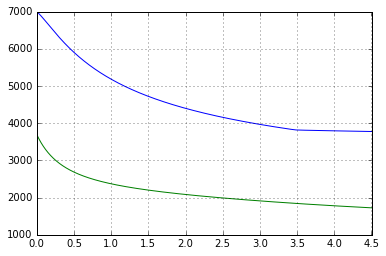

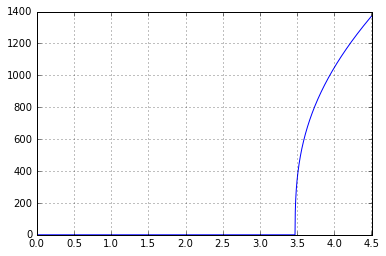

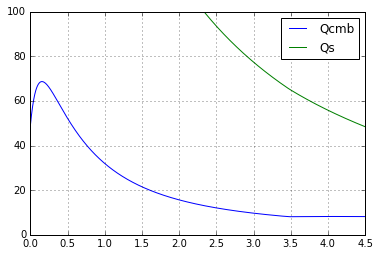

In [12]:
pl = th.Planet_Stevenson()

pl.params.mantle.A = 2e4
pl.params.mantle.nu_0 = 5e11

times = np.linspace(0,4500e6*3e7,5000)
T_cmb0 = 7000
# T_um0 = pl.mantle_layer.adiabat_from_bottom(T_cmb, pl.mantle_layer.outer_radius)-100
T_um0 = 3700
x0 = [T_cmb0, T_um0]
solution = pl.integrate(times, x0)

plt.plot(times/3e7/1e9, solution)
plt.grid()

R_i = np.array([pl.core_layer.R_i(x) for x in solution[:,0]])
plt.figure()
plt.plot(times/3e7/1e9, R_i/1e3)
plt.grid()

Qcmb = pl.mantle_layer.lower_boundary_flux(solution[:,0], solution[:,1])*pl.mantle_layer.inner_surface_area
Qs = pl.mantle_layer.upper_boundary_flux(solution[:,0], solution[:,1])*pl.mantle_layer.outer_surface_area
plt.figure()
plt.plot(times/3e7/1e9, Qcmb/1e12, label="Qcmb")
plt.plot(times/3e7/1e9, Qs/1e12, label='Qs')
plt.legend(loc=0)
plt.ylim(0,100)
plt.grid()

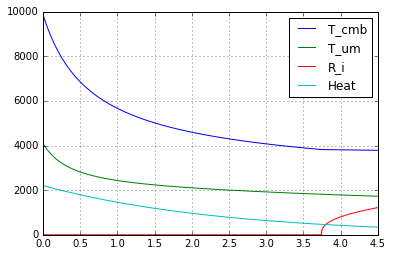

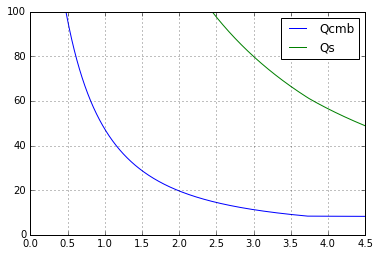

In [13]:
plb = th.Planet_Stevenson_backward()
times = np.linspace(0,4500e6*3e7,5000)
te = 4500e6*3e7
plb.params.mantle.time_end = te
plb.params.mantle.A = 2e4
plb.params.mantle.nu_0 = 5e11
T_cmb0 = 3786
T_um0 = 1728

x0 = [T_cmb0, T_um0]
solutionb = plb.integrate(times, x0, full_output=False)
R_i = np.array([plb.core_layer.R_i(x) for x in solutionb[:,0]])
H = plb.mantle_layer.heat_production(times)
MEB = plb.mantle_layer.energy_balance(solutionb[:,0], solutionb[:,1],times)
Qcmb = plb.mantle_layer.lower_boundary_flux(solutionb[:,0], solutionb[:,1])*plb.mantle_layer.inner_surface_area
Qs = plb.mantle_layer.upper_boundary_flux(solutionb[:,0], solutionb[:,1])*plb.mantle_layer.outer_surface_area
# plt.figure()
plt.plot((te-times)/3e7/1e9, solutionb[:,0], label='T_cmb')
plt.plot((te-times)/3e7/1e9, solutionb[:,1], label='T_um')
plt.plot((te-times)/3e7/1e9, R_i/1e3, label='R_i')
plt.plot((te-times)/3e7/1e9, H/np.mean(H)*1000, label='Heat')
plt.grid()
plt.legend(loc=0)
plt.figure()
plt.plot((te-times)/3e7/1e9, Qcmb/1e12, label='Qcmb')
plt.plot((te-times)/3e7/1e9, Qs/1e12, label='Qs')
plt.ylim(0,100)
plt.legend(loc=0)
plt.grid()